# Practice: Wk.10

In [2]:
# %load_ext rpy2.ipython
%reload_ext rpy2.ipython

---------------

## Week 10, Nov 4-10: R code “Example 6.1 R script” - Influential points using Cook's Distance, Robust Mahalanobis Distance

This code can be used to perform analysis on influential points in datasets. Read the code carefully and run it. Understand its output.

   Obs     y x1   x2
1    1 16.68  7  560
2    2 11.50  3  220
3    3 12.03  3  340
4    4 14.88  4   80
5    5 13.75  6  150
6    6 18.11  7  330
7    7  8.00  2  110
8    8 17.83  7  210
9    9 79.24 30 1460
10  10 21.50  5  605
11  11 40.33 16  688
12  12 21.00 10  215
13  13 13.50  4  255
14  14 19.75  6  462
15  15 24.00  9  448
16  16 29.00 10  776
17  17 15.35  6  200
18  18 19.00  7  132
19  19  9.50  3   36
20  20 35.10 17  770
21  21 17.90 10  140
22  22 52.32 26  810
23  23 18.75  9  450
24  24 19.83  8  635
25  25 10.75  4  150


R[write to console]: Loading required package: nlme

R[write to console]: This is mgcv 1.9-0. For overview type 'help("mgcv-package")'.

R[write to console]: Loading required package: carData



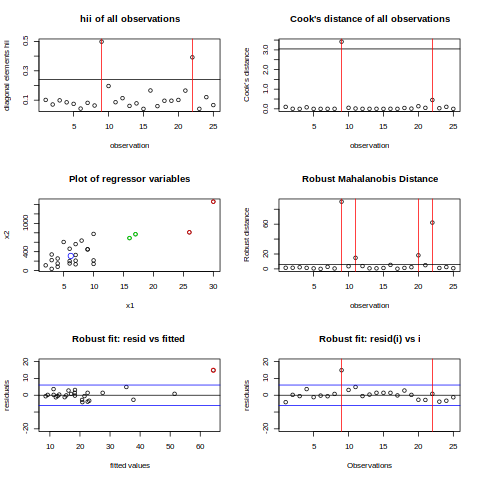

In [2]:
%%R

# Example 6.1: Delivery time data (Multiple linear regression)
#
# This example illustrates how to identify leverage and influential points
# using hii, Cook's and robust Mahalanobis distance and robust fit residuals.

### [1] Reading data into R
data2=read.table(file="3-1.prn", header=TRUE) 
attach(data2)  
print(data2)  

### [2] Plotting/visualizing data
par(mfrow=c(2,1))  
plot(x1,y,main="Leverage and/or influencial points?")    
plot(x2,y)     

### [3] Use Hat matrix and Cook's distances to identify leverage and influential points
library(mgcv)   #load package: mgcv
library(car)    #load package: car

fit1=lm(y~x1+x2)  
fit2=gam(y~x1+x2) # Generalized Additive Model - Allows for simple hii
d1=influence.gam(fit2)  #compute diagonal elements of the hat matrix
d2=cooks.distance(fit1) # compute Cook's distance
    
par(mfrow=c(3,2))
plot(d1, xlab="observation", ylab="diagonal elements hii", main="hii of all observations")
abline(h=2*3/length(y))  # p=2+1=3; draw a horizontal line at 2 times the average of hii
abline(v=9, col="red")   # highlight obs 9, a leverage point
abline(v=22,col="red")   # highlight obs 22, a leverage point

plot(d2, xlab="observation", ylab="Cook's distance", main="Cook's distance of all observations")
abline(h=qf(0.95,3,length(y)-3)) # draw a line at the reference F value. (95% within 3 SD's)
abline(v=9, col="red") # highlight obs 9, an influential point.
abline(v=22,col="red") # highlight obs 22, a leverage point but not an influential point.

### [4] Use robust Mahalanobis distance and residuals to identify
#       leverage and influential points
X=cbind(x1,x2) # Matrix of x's

library(MASS)        #load package MASS
library(robustbase)  #load package robustbase

rob1=cov.rob(X)   #compute robust estimates of centre and covariance
mx=rob1$center
cx=rob1$cov

plot(x1,x2, main="Plot of regressor variables") # we see the need for robust estimates of location and scale for X.
points(mx[1],mx[2],col="blue",cex=1.5) # Plot center; rob1$center
points(x1[c(9,22)],x2[c(9,22)],col="red") 
points(x1[c(11,20)],x2[c(11,20)],col="green") 

d3=mahalanobis(X,mx,cx) # compute robust mahalanobis distance: x's, robust center, robust cov
# The plot of Mahalanobis distances below suggests obs 9, 22, 11, 20 are leverage points.
plot(d3,xlab="observation", ylab="Robust distance", main="Robust Mahalanobis Distance")
abline(v=9, col="red")
abline(v=11, col="red")
abline(v=20, col="red")
abline(v=22, col="red") 
abline(h=qchisq(0.95,2)) # draw a horizontal line at the chi^2 reference value.

fit3=lmrob(y~x1+x2)   # robust fit of the multiple linear model
resid=fit3$residuals  # retrieve residuals from the robust fit
fitted=y-resid        # computed fitted values from the robust fit; fit3$fitted
s=fit3$scale          # retrieve estimated sigma from the robust fit ***

plot(fitted, resid, main="Robust fit: resid vs fitted ", ylim=c(-20,20), xlab="fitted values", ylab="residuals")
abline(h=0)
abline(h=3*s, col="blue")
abline(h=-3*s, col="blue")
points(fitted[9], resid[9], col="red", cex=1.2)

plot(c(1:length(resid)), resid, main="Robust fit: resid(i) vs i", xlab="Observations", ylab="residuals", ylim=c(-20,20))
abline(h=0)
abline(h=3*s, col="blue")
abline(h=-3*s, col="blue")
abline(v=9, col="red")   # shows obs 9 is an influential point.
abline(v=22, col="red")  # shows obs 22 is not an influential point.




---------------

## [Week 10, Nov 4-10] Influence analysis for Questions 6.1 - 6.9

Apply R code “Example 6.1 R script” to perform influence analysis for Questions 6.1 - 6.9 in the textbook

... Influence analysis of data in tables B1 to B10 (safe B3)

---------------

## [Week 10, Nov 4-10] R code “Example 7.1 R script” and “Example 7.2 R script”

R code “Example 7.1 R script” and “Example 7.2 R script” are posted on Brightspace. These codes are for fitting polynomial models and piecewise polynomial models to a dataset with one predictor variable. Run these codes and understand the R commands as well as the R outputs.

### 7.1 R Script

      x    y
1   1.0  6.3
2   1.5 11.1
3   2.0 20.0
4   3.0 24.0
5   4.0 26.1
6   4.5 30.0
7   5.0 33.8
8   5.5 34.0
9   6.0 38.1
10  6.5 39.9
11  7.0 42.0
12  8.0 46.1
13  9.0 53.1
14 10.0 52.0
15 11.0 52.5


16 12.0 48.0
17 13.0 42.8
18 14.0 27.8
19 15.0 21.9

Call:
lm(formula = y ~ x1 + x2 + x3 + x4)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1384 -1.0550 -0.3203  1.0779  4.5030 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 44.165124   1.072816  41.167 5.21e-16 ***
x1           4.115267   0.388740  10.586 4.59e-08 ***
x2          -0.394166   0.129932  -3.034  0.00894 ** 
x3          -0.045268   0.012479  -3.628  0.00274 ** 
x4          -0.003505   0.002812  -1.247  0.23298    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.539 on 14 degrees of freedom
Multiple R-squared:  0.9736,	Adjusted R-squared:  0.9661 
F-statistic: 129.1 on 4 and 14 DF,  p-value: 6.994e-11



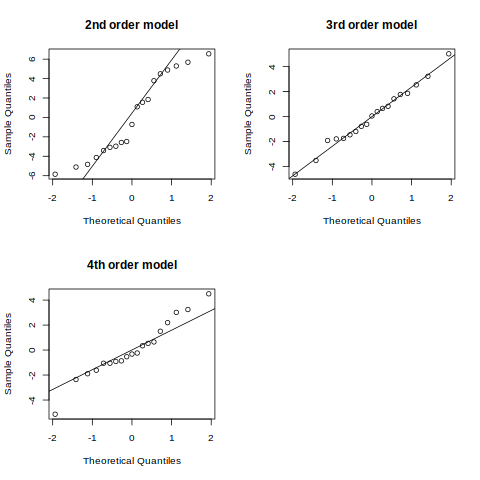

In [6]:
%%R
# Example 7.1: The hardwood data (polynomial regression)
#
# This example illustrates the use of forward selection for determining
# the order of a polynomial regression model.

### [1] Reading data into R

rm(x,y)

data1=read.table(file="7-1.prn", header=TRUE) 
attach(data1)  
print(data1)  

### [2] Polynomial model selection
par(mfrow=c(2,2)) 
 
plot(x,y,main="three polynomial models", xlab="% hardwood", ylab="tensile strength")

x1=x-mean(x)   #centered regressor
x2=x1^2
x3=x1^3
x4=x1^4

l2=lm(y~x1+x2)      # fit 2nd, 3rd and 4th order models
l3=lm(y~x1+x2+x3)
l4=lm(y~x1+x2+x3+x4)

r2=l2$residuals     # retrieve residuals from all fits
fitted2=y-r2
r3=l3$residuals
fitted3=y-r3
r4=l4$residuals
fitted4=y-r4

lines(x, fitted2, col="red")   # plot fitted lines from the 3 models
lines(x, fitted3, col="blue")
lines(x, fitted4, col="green")

plot(fitted2, r2, main="2nd order model") # residual vs fitted plots
abline(h=0)
plot(fitted3, r3, main="3rd order model")
abline(h=0)
plot(fitted4, r4, main="4th order model")
abline(h=0)

par(mfrow=c(2,2))                   # check error normality for all 3 models
qqnorm(r2,main="2nd order model")
qqline(r2)
qqnorm(r3,main="3rd order model")
qqline(r3)
qqnorm(r4,main="4th order model")
qqline(r4)

summary(l2)                         # print out estimated models
summary(l3)  # the best model
summary(l4)


### 7.2 R Script

    i    x     y
1   1  0.0  8.33
2   2  0.5  8.23
3   3  1.0  7.17
4   4  1.5  7.14
5   5  2.0  7.31
6   6  2.5  7.60
7   7  3.0  7.94
8   8  3.5  8.30
9   9  4.0  8.76
10 10  4.5  8.71
11 11  5.0  9.71
12 12  5.5 10.26
13 13  6.0 10.91
14 14  6.5 11.67
15 15  7.0 11.76
16 16  7.5 12.81
17 17  8.0 13.30
18 18  8.5 13.88
19 19  9.0 14.59
20 20  9.5 14.05
21 21 10.0 14.48
22 22 10.5 14.92
23 23 11.0 14.37
24 24 11.5 14.63
25 25 12.0 15.18
26 26 12.5 14.51
27 27 13.0 14.34
28 28 13.5 13.81
29 29 14.0 13.79
30 30 14.5 13.05
31 31 15.0 13.04
32 32 15.5 12.60
33 33 16.0 12.05
34 34 16.5 11.15
35 35 17.0 11.15
36 36 17.5 10.14
37 37 18.0 10.08
38 38 18.5  9.78
39 39 19.0  9.80
40 40 19.5  9.95
41 41 20.0  9.51


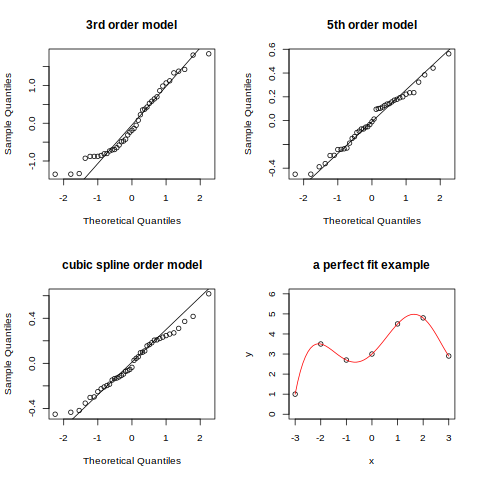

In [3]:
%%R
# Example 7.2: Battery voltage drop data (piecewise polynomial model)
#
# This example illustrates the computation of piecewise polynomial or spline
# model for multiple linear regression and compares it to polynomial model.

### [1] Reading data into R

rm(x,y)
data1=read.table(file="7-2.prn", header=TRUE) 
attach(data1)  
print(data1)  

### [2] Fit polynomial models
par(mfrow=c(2,2)) 
 
plot(x,y,main="Votage drop data", xlab="time", ylab="voltage drop")

x1=x      # compute regressors for polynomial models
x2=x^2
x3=x^3
x4=x^4
x5=x^5    # highest order under consideration is p=5

l3=lm(y~x1+x2+x3)         # fit the 3rd order model
r3=l3$residuals
fitted3=y-r3
lines(x,fitted3,col="red")  # this model fits poorly


l5=lm(y~x1+x2+x3+x4+x5)  # fit the 5th order model
r5=l5$residuals     
fitted5=y-r5
lines(x,fitted5,col="blue")  # this model gives a good fit

### [3] Fit piecewise polynomial model to the data with two given knots
#       t1=6.5 and t2=13. Here, we use the cubic splines with continuous
#       second directive (see lecture notes).

x6=pmax(x-6.5,0)^3
x7=pmax(x-13, 0)^3
lsp=lm(y~x1+x2+x3+x6+x7)
rsp=lsp$residuals
fittedsp=y-rsp
lines(x,fittedsp,col="green") # cubic splines fits very well and nearly
                              # overlaps the 5th order model.

### [4] compare the three models above through residual plots 

plot(fitted3, r3, main="3rd order model") # residual vs fitted plots
abline(h=0)
plot(fitted5, r5, main="5th order model")
abline(h=0)
plot(fittedsp, rsp, main="cubic spline model")
abline(h=0)

par(mfrow=c(2,2))                   # check error normality for all 3 models
qqnorm(r3,main="3rd order model")
qqline(r3)
qqnorm(r5,main="5th order model")
qqline(r5)
qqnorm(rsp,main="cubic spline order model")
qqline(rsp)

summary(l3)                         # print out estimated models
summary(l5)           # a good model but order a bit high
summary(lsp)          # a good model

### [5] An example of a perfect but trivial fit.
#       For a set of n points, a polynomial model of order p=(n-1) will
#       give a perfect fit but such a model is usually not very useful.

# Consider the following data set of n=7 points

x=c(-3, -2, -1, 0, 1, 2, 3)
y=c(1, 3.5, 2.7, 3, 4.5, 4.8, 2.9)
plot(x,y,ylim=c(0,6), main="a perfect fit example")

x1=x      # compute regressors for a polynomial model of order p=n-1=6
x2=x^2
x3=x^3
x4=x^4
x5=x^5    
x6=x^6

l6=lm(y~x1+x2+x3+x4+x5+x6) # fit the polynomial model of order p=6
r6=l6$residuals
fitted6=y-r6
#lines(x,fitted6,col="red")

x0=seq(-3,3,by=0.1)  # plot the fitted model over a fine grid of equally spaced points
coef=l6$coef
y0=coef[1]+coef[2]*x0+coef[3]*x0^2+coef[4]*x0^3+coef[5]*x0^4+coef[6]*x0^5+coef[7]*x0^6
lines(x0,y0,col="red")  # a perfect fit, but no parsimony and too many parameters.



---------------